Many companies share their financial results for a quarter or a year through earning calls and reports. It is a way to communicate with shareholders about the company’s performance and strategy for the future. Although, the full report with all the numbers and plans is a good way to look at company's present and future, the important part of this earning call is a speech by the CEO/CFO where they highlight company’s progress and answer some questions by investors.

### Importing Required Libraries

In [130]:
import pandas as pd, numpy as np
import os, re
import nltk
nltk.download(['punkt','stopwords','averaged_perceptron_tagger','vader_lexicon','wordnet','universal_tagset','maxent_ne_chunker','words'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshulkhairari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshulkhairari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anshulkhairari/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anshulkhairari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshulkhairari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/anshulkhairari/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package

True

### Read in the .txt using pandas

In [65]:
speech = open('data.txt')
speech = speech.readlines()

### Cleaning the data for Language Processing

In [66]:
# Removing '\n' due to conversion of .txt to list
speech_clean = [re.sub('\n','',ceo) for ceo in speech]
speech_clean[:5]

['Good morning everyone and thanks for joining us',
 'I want to start our call today by looking back',
 '2016 was a transformative year for us',
 'Transformations are difficult, and this one was especially challenging',
 'We started 2016 by resetting and focusing on why people use Twitter']

### Natural Language Pre-Processing

In [67]:
# Tokenization

from nltk.tokenize import word_tokenize

words = [word_tokenize(sent) for sent in speech_clean]
words[:5]

[['Good', 'morning', 'everyone', 'and', 'thanks', 'for', 'joining', 'us'],
 ['I', 'want', 'to', 'start', 'our', 'call', 'today', 'by', 'looking', 'back'],
 ['2016', 'was', 'a', 'transformative', 'year', 'for', 'us'],
 ['Transformations',
  'are',
  'difficult',
  ',',
  'and',
  'this',
  'one',
  'was',
  'especially',
  'challenging'],
 ['We',
  'started',
  '2016',
  'by',
  'resetting',
  'and',
  'focusing',
  'on',
  'why',
  'people',
  'use',
  'Twitter']]

In [96]:
# Removing stopwords and Punctuations

from nltk.corpus import stopwords
from string import punctuation

stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)
stop_final = stop_nltk + stop_punct

tokens = []
for w in words:
    for i in w:
        if(i.lower() not in stop_final):
            tokens.append(i)
            
tokens

['Good',
 'morning',
 'everyone',
 'thanks',
 'joining',
 'us',
 'want',
 'start',
 'call',
 'today',
 'looking',
 'back',
 '2016',
 'transformative',
 'year',
 'us',
 'Transformations',
 'difficult',
 'one',
 'especially',
 'challenging',
 'started',
 '2016',
 'resetting',
 'focusing',
 'people',
 'use',
 'Twitter',
 "'s",
 'fastest',
 'way',
 'see',
 "'s",
 'happening',
 'everyone',
 'talking',
 'reset',
 'refocused',
 'strengths',
 'achieved',
 'one',
 'hardest',
 'things',
 'consumer',
 'services',
 'scale',
 'reversed',
 'reaccelerated',
 'usage',
 "'re",
 'thrilled',
 'report',
 'daily',
 'active',
 'usage',
 'accelerated',
 'third',
 'quarter',
 'row',
 'see',
 'strong',
 'growth',
 'continuing',
 'making',
 'experience',
 'little',
 'better',
 'every',
 'single',
 'day',
 'may',
 'felt',
 'like',
 "n't",
 'changing',
 'much',
 'past',
 'year',
 'hundreds',
 'little',
 'changes',
 'added',
 'predictable',
 'sustained',
 'growth',
 'use',
 'foundation',
 'inventive',
 'take',
 'b

In [196]:
# Frequency Distribution of Words

from nltk.probability import FreqDist
freq_words = FreqDist(tokens)
freq_words.most_common(10)

[("'s", 50),
 ('lot', 28),
 ('Twitter', 25),
 ("'re", 23),
 ('people', 22),
 ('really', 17),
 ('see', 15),
 ('us', 13),
 ('growth', 13),
 ('world', 13)]

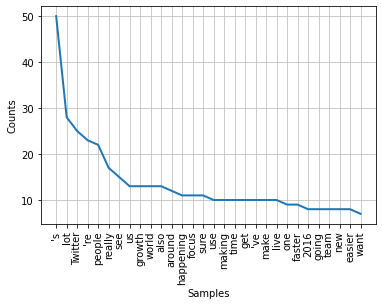

In [186]:
import matplotlib.pyplot as plt
freq_words.plot(30,cumulative=False)
plt.show()

In [103]:
# Stemming

from nltk.stem.snowball import SnowballStemmer
s_stem = SnowballStemmer(language='english')

stemmed_tokens = []
for i in tokens:
    s_words = s_stem.stem(i)
    stemmed_tokens.append(s_words)

stemmed_tokens

['good',
 'morn',
 'everyon',
 'thank',
 'join',
 'us',
 'want',
 'start',
 'call',
 'today',
 'look',
 'back',
 '2016',
 'transform',
 'year',
 'us',
 'transform',
 'difficult',
 'one',
 'especi',
 'challeng',
 'start',
 '2016',
 'reset',
 'focus',
 'peopl',
 'use',
 'twitter',
 "'s",
 'fastest',
 'way',
 'see',
 "'s",
 'happen',
 'everyon',
 'talk',
 'reset',
 'refocus',
 'strength',
 'achiev',
 'one',
 'hardest',
 'thing',
 'consum',
 'servic',
 'scale',
 'revers',
 'reacceler',
 'usag',
 're',
 'thrill',
 'report',
 'daili',
 'activ',
 'usag',
 'acceler',
 'third',
 'quarter',
 'row',
 'see',
 'strong',
 'growth',
 'continu',
 'make',
 'experi',
 'littl',
 'better',
 'everi',
 'singl',
 'day',
 'may',
 'felt',
 'like',
 "n't",
 'chang',
 'much',
 'past',
 'year',
 'hundr',
 'littl',
 'chang',
 'ad',
 'predict',
 'sustain',
 'growth',
 'use',
 'foundat',
 'invent',
 'take',
 'bigger',
 'risk',
 "'s",
 'exact',
 'go',
 'said',
 'last',
 'call',
 'revenu',
 'growth',
 'lag',
 'usag',


In [128]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# A. Lemmatizing on data with stop-words

lemma_words = []
processor = []
for i in words:
    for w in i:
        l_words = lemmatizer.lemmatize(w)
        processor.append(l_words)
    lemma_words.append(processor)

print(lemma_words)

# B. Lemmatizing on data without stop-words/ on tokens

lemma_tokens = []
for i in tokens:
    l_tokens = lemmatizer.lemmatize(i)
    lemma_tokens.append(i)

print(lemma_tokens[:10])

[['Good', 'morning', 'everyone', 'and', 'thanks', 'for', 'joining', 'u', 'I', 'want', 'to', 'start', 'our', 'call', 'today', 'by', 'looking', 'back', '2016', 'wa', 'a', 'transformative', 'year', 'for', 'u', 'Transformations', 'are', 'difficult', ',', 'and', 'this', 'one', 'wa', 'especially', 'challenging', 'We', 'started', '2016', 'by', 'resetting', 'and', 'focusing', 'on', 'why', 'people', 'use', 'Twitter', 'It', "'s", 'the', 'fastest', 'way', 'to', 'see', 'what', "'s", 'happening', ',', 'and', 'what', 'everyone', 'is', 'talking', 'about', 'We', 'reset', 'and', 'refocused', 'on', 'our', 'strength', ',', 'and', 'we', 'achieved', 'one', 'of', 'the', 'hardest', 'thing', 'to', 'do', 'for', 'a', 'consumer', 'service', 'scale', 'We', 'reversed', 'and', 'reaccelerated', 'our', 'usage', 'We', "'re", 'thrilled', 'to', 'report', 'that', 'daily', 'active', 'usage', 'accelerated', 'for', 'the', 'third', 'quarter', 'in', 'a', 'row', ',', 'and', 'we', 'see', 'that', 'strong', 'growth', 'continuing'

In [137]:
# Part-Of-Speech (POS) Tagging and Name Entity Recognition (NER)

pos_tokens = nltk.pos_tag(lemma_tokens)
pos_tokens[:10]

ner_tokens = nltk.chunk.ne_chunk(pos_tokens, binary=False)
ner_tokens


The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [Tree('GPE', [('Good', 'JJ')]), ('morning', 'NN'), ('everyone', 'NN'), ('thanks', 'NNS'), ('joining', 'VBG'), ('us', 'PRP'), ('want', 'JJ'), ('start', 'NN'), ('call', 'NN'), ('today', 'NN'), ('looking', 'VBG'), ('back', 'RB'), ('2016', 'CD'), ('transformative', 'JJ'), ('year', 'NN'), ('us', 'PRP'), ('Transformations', 'NNP'), ('difficult', 'JJ'), ('one', 'CD'), ('especially', 'RB'), ('challenging', 'VBG'), ('started', 'JJ'), ('2016', 'CD'), ('resetting', 'VBG'), ('focusing', 'VBG'), ('people', 'NNS'), ('use', 'VBP'), Tree('PERSON', [('Twitter', 'NNP')]), ("'s", 'POS'), ('fastest', 'JJS'), ('way', 'NN'), ('see', 'VBP'), ("'s", 'POS'), ('happening', 'VBG'), ('everyone', 'NN'), ('talking', 'VBG'), ('reset', 'VB'), ('refocused', 'JJ'), ('strengths', 'NNS'), ('achieved', 'VBN'), ('one', 'CD'), ('hardest', 'JJS'), ('things', 'NNS'), ('consumer', 'NN'), ('services', 'NNS'), ('scale', 'NN'), ('reversed', 'VBD'), ('reaccelerated', 'JJ'), ('usage', 'NN'), ("'re", 'VBP'), ('thrilled', '

In [148]:
# Chunking

from nltk.chunk import tree2conlltags, conlltags2tree
iob_tagged = tree2conlltags(ner_tokens)
# print(iob_tagged)

reg1 = "NP: {<DT>?<JJ>*<NN>}"
reg2 = "VP: {<JJ|RB>*<VB|VBP|VBG|VBN|VBD|VBZ>}"
cp = nltk.RegexpParser(reg1)
cp2 = nltk.RegexpParser(reg2)
cs = cp.parse(iob_tagged)
cs2 = cp2.parse(cs)
print(cs)

(S
  (NP Good/JJ/B-GPE morning/NN/O)
  (NP everyone/NN/O)
  thanks/NNS/O
  joining/VBG/O
  us/PRP/O
  (NP want/JJ/O start/NN/O)
  (NP call/NN/O)
  (NP today/NN/O)
  looking/VBG/O
  back/RB/O
  2016/CD/O
  (NP transformative/JJ/O year/NN/O)
  us/PRP/O
  Transformations/NNP/O
  difficult/JJ/O
  one/CD/O
  especially/RB/O
  challenging/VBG/O
  started/JJ/O
  2016/CD/O
  resetting/VBG/O
  focusing/VBG/O
  people/NNS/O
  use/VBP/O
  Twitter/NNP/B-PERSON
  's/POS/O
  fastest/JJS/O
  (NP way/NN/O)
  see/VBP/O
  's/POS/O
  happening/VBG/O
  (NP everyone/NN/O)
  talking/VBG/O
  reset/VB/O
  refocused/JJ/O
  strengths/NNS/O
  achieved/VBN/O
  one/CD/O
  hardest/JJS/O
  things/NNS/O
  (NP consumer/NN/O)
  services/NNS/O
  (NP scale/NN/O)
  reversed/VBD/O
  (NP reaccelerated/JJ/O usage/NN/O)
  're/VBP/O
  thrilled/VBN/O
  report/JJ/O
  daily/RB/O
  (NP active/JJ/O usage/NN/O)
  accelerated/VBD/O
  (NP third/JJ/O quarter/NN/O)
  (NP row/NN/O)
  see/VBP/O
  (NP strong/JJ/O growth/NN/O)
  continuing/

### Pre-Trained Sentimental Analyzer

In [185]:
# Using Valence Aware Dictionary and sEntiment Reasoner (VADER)

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

sentiment_words = []        
for x in tokens:
    sentiment_words.append(sentiment_scores(x))
sentiment_words[:5]

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  0.0 % Neutral
sentence was rated as  100.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  0.0 % Neutral
sentence was rated as  100.0 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg

[None, None, None, None, None]

In [191]:
# Transforming initial text to dataframe and applying VADER

text_df = pd.DataFrame(speech_clean, columns=['Sentence'])
text_df

sia = SentimentIntensityAnalyzer()

text_df['Scores'] = text_df['Sentence'].apply(lambda Sentence: sia.polarity_scores(Sentence))
text_df['Compound']  = text_df['Scores'].apply(lambda score_dict: score_dict['compound'])
text_df['Sentiment'] = text_df['Compound'].apply(lambda c: 'positive' if c >0 else ('negative' if c<0 else 'neutral'))
text_df

print(text_df[['Sentence','Sentiment']].groupby("Sentiment").count())

import statistics


           Sentence
Sentiment          
negative          4
neutral          30
positive         79


In [192]:
# Overall speech sentiment
statistics.mode(text_df['Sentiment'])

'positive'